In [14]:
import rosbag
import cv2
from cv_bridge import CvBridge
import os
from fnmatch import fnmatch


In [15]:
import tf
import rospy
import rosbag
from tf2_msgs.msg import TFMessage
from std_msgs.msg import Header
from sensor_msgs.msg import CameraInfo, Imu, PointField, NavSatFix
import sensor_msgs.point_cloud2 as pc2
from geometry_msgs.msg import TransformStamped, TwistStamped, Transform
from cv_bridge import CvBridge


In [16]:
%matplotlib inline

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt


In [17]:
bag_file_dir = '/media/sf_vol/didi/Didi-Training-Release-1'


* Work through the bag files and show what's in them

In [20]:
files = os.listdir(bag_file_dir)
for file in files:
    if fnmatch(file, '*.bag'):
        print ('Processing bag {}'.format(file))
        bag = rosbag.Bag(os.path.join(bag_file_dir, file))
        info = bag.get_type_and_topic_info()[1]
        topics = info.keys()
        #print ('  Topics: {}'.format(topics))
        #for topic in topics:
            #print ('Topic {}: {}'.format(topic, info[topic]))
        #print ('*'*20)            
        
        

Processing bag 5mph.bag
Processing bag approach_1.bag
Processing bag approach_2.bag
Processing bag approach_3.bag
Processing bag corner_pass.bag
Processing bag intersection_1.bag
Processing bag overtake.bag
Processing bag sitting.bag
Processing bag spin.bag
Processing bag spin_3.bag
Processing bag spin_shoreline.bag


Extract the following data:
    
* rtkfix is thh cartesian coordinates of 'things' (what?)
* /gps/rtkfix also includes the capture vehicle
* /obs1/ topic namespace is the obstacle (will be renamed)
* /velodyne_packets and /velodyne points both available (points won't be in later releases!!)



More detailed investigation of a single bag...

*TODO* Turn this into a function


In [25]:
import numpy as np
bag = rosbag.Bag(os.path.join(bag_file_dir, '5mph.bag'))
cvbridge = CvBridge()
count = 0
point_cloud = []
for topic, msg, t in bag.read_messages(
    topics = [
        '/gps/time',
        '/gps/fix',
        '/gps/rtkfix',
        '/obs1/gps/rtkfix',
        '/image_raw',
        '/velodyne_points',
        '/velodyne_packets',
        '/radar/range',
        '/radar/points',
        '/radar/tracks'
    ]):
    print ('topic: {}'.format(topic))
    if topic == '/image_raw':
        img = cvbridge.imgmsg_to_cv2(msg, "bgr8")
        #cv2.imshow('image_raw',img)
        #key = cv2.waitKey(1)
    elif topic == '/velodyne_points':
        #print ('*'*50)
        #print (msg)
        #data = np.fromstring(msg.data, dtype=np.uint32)
        #print data.shape
        count +=1
        array = np.fromstring(msg.data, dtype=np.float64)
        point_cloud.append(array.reshape(-1,4))
        
    #else:
        #print ('topic: {}'.format(topic))
    if count == 5:
        break
        

topic: /image_raw
topic: /radar/points
topic: /radar/tracks
topic: /radar/range
topic: /image_raw
topic: /velodyne_packets
topic: /velodyne_points
topic: /gps/time
topic: /image_raw
topic: /radar/tracks
topic: /radar/points
topic: /radar/range
topic: /gps/rtkfix
topic: /obs1/gps/rtkfix
topic: /image_raw
topic: /radar/tracks
topic: /radar/points
topic: /radar/range
topic: /image_raw
topic: /gps/time
topic: /velodyne_packets
topic: /gps/fix
topic: /velodyne_points
topic: /obs1/gps/rtkfix
topic: /gps/rtkfix
topic: /image_raw
topic: /radar/points
topic: /radar/tracks
topic: /radar/range
topic: /image_raw
topic: /radar/points
topic: /radar/range
topic: /radar/tracks
topic: /image_raw
topic: /gps/time
topic: /velodyne_packets
topic: /gps/fix
topic: /velodyne_points
topic: /obs1/gps/rtkfix
topic: /gps/rtkfix
topic: /image_raw
topic: /radar/range
topic: /radar/tracks
topic: /radar/points
topic: /image_raw
topic: /radar/tracks
topic: /radar/points
topic: /radar/range
topic: /image_raw
topic: /g

In [28]:
print len(point_cloud)
print point_cloud[0].shape

5
(39674, 4)


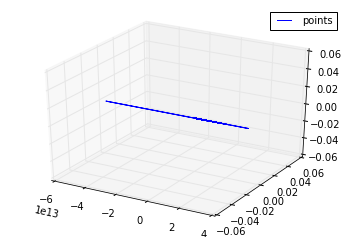

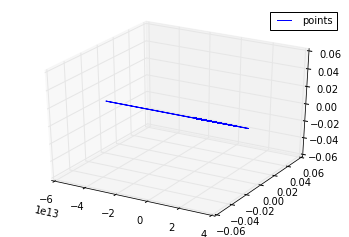

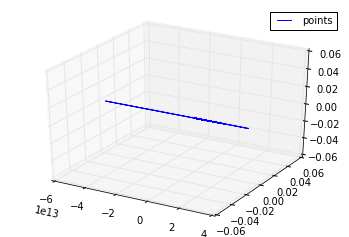

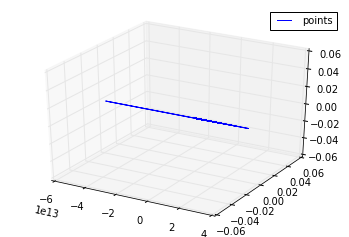

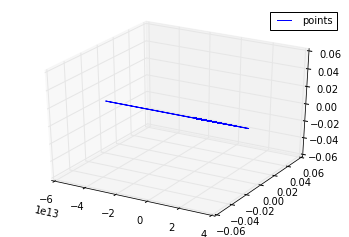

In [30]:
mpl.rcParams['legend.fontsize'] = 10

for i in range(len(point_cloud)):
    pc = point_cloud[i]
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    x = pc[:,0]
    y = pc[:,1]
    z = pc[:,2]
    ax.plot(x, y, z, label='points')
    ax.legend()

    plt.show()